<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/full%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import math

from folium.plugins import HeatMap
import folium

plt.style.use('seaborn')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
chicago_df_1 = pd.read_csv('/content/drive/My Drive/d1.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/drive/My Drive/d2.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/drive/My Drive/d3.csv', error_bad_lines=False)
chicago_df_4 = pd.read_csv('/content/drive/My Drive/d4.csv', error_bad_lines=False)
chicago_df_5 = pd.read_csv('/content/drive/My Drive/d5.csv', error_bad_lines=False)
chicago_df_6 = pd.read_csv('/content/drive/My Drive/d6.csv', error_bad_lines=False)


In [0]:
df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3,chicago_df_4,chicago_df_5,chicago_df_6], ignore_index=False, axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604685 entries, 0 to 258974
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1604685 non-null  int64  
 1   Case Number           1604685 non-null  object 
 2   Date                  1604685 non-null  object 
 3   Primary Type          1604685 non-null  object 
 4   Location Description  1604685 non-null  object 
 5   Arrest                1604685 non-null  bool   
 6   District              1604684 non-null  float64
 7   Ward                  1604661 non-null  float64
 8   Community Area        1604679 non-null  float64
 9   X Coordinate          1585027 non-null  float64
 10  Y Coordinate          1585027 non-null  float64
 11  Year                  1604685 non-null  int64  
 12  Latitude              1585027 non-null  float64
 13  Longitude             1585027 non-null  float64
 14  Location              1585027 non-n

In [7]:
np.count_nonzero(df.isnull())

98321

In [8]:
df.dropna(how='any', axis=0, inplace=True)
np.count_nonzero(df.isnull())

0

In [0]:
df.drop(['Location'], axis=1, inplace=True)

In [0]:
Groups = df.groupby(df['Primary Type'])
Groups = dict(list(Groups))
data = [Groups['JEWEL THEFT MURDER']]
data = pd.concat(data, axis = 0)
del Groups
del df

In [13]:
print('Range of dates: {} to {}'.format(data.Date.min(), data.Date.max()))

Range of dates: 01-01-2014 00:00 to 12/31/2019 12:50:00 PM


In [14]:
print('Range of year: {} to {}'.format(data.Year.min(), data.Year.max()))

Range of year: 2014 to 2019


In [15]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
159,9811709,HX460137,2014-10-08 13:30:00,JEWEL THEFT MURDER,RESTAURANT,False,1.0,42.0,32.0,1177071.0,1897625.0,2014,41.874423,-87.625337
1826,10054352,HY236772,2014-09-01 00:00:00,JEWEL THEFT MURDER,OTHER,False,4.0,10.0,55.0,1187697.0,1819718.0,2014,41.660392,-87.588799
1827,10331680,HY522226,2014-12-05 15:00:00,JEWEL THEFT MURDER,RESIDENCE,False,25.0,36.0,18.0,1129140.0,1916793.0,2014,41.927973,-87.800883
1828,9448484,HX101799,2014-01-02 20:00:00,JEWEL THEFT MURDER,CTA BUS,False,6.0,21.0,71.0,1167709.0,1852313.0,2014,41.750289,-87.661011
1832,9457725,HX110682,2014-01-10 23:30:00,JEWEL THEFT MURDER,STREET,False,11.0,37.0,23.0,1147957.0,1906331.0,2014,41.898923,-87.732007


In [0]:
data.index = pd.DatetimeIndex(data.Date)

In [0]:
data['Month'] = data.index.month
data['dayOfWeek'] = data.index.dayofweek
data['dayOfMonth'] = data.index.day
data['dayOfYear'] = data.index.dayofyear
data['weekOfMonth'] = data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
data['weekOfYear'] = weekOfYear

In [0]:
data.drop(['ID', 'Case Number'], axis=1, inplace=True)

In [20]:
data.Arrest.value_counts()

False    328866
True      39553
Name: Arrest, dtype: int64

In [21]:
data.Arrest = data.Arrest.astype(int)
data.Arrest.value_counts()

0    328866
1     39553
Name: Arrest, dtype: int64

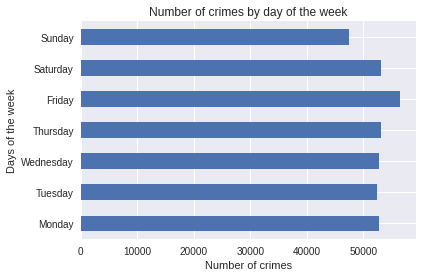

In [22]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()


In [23]:
data.dayOfWeek.value_counts(normalize=True)

4    0.153279
3    0.144534
5    0.144129
2    0.143383
0    0.143359
1    0.142455
6    0.128861
Name: dayOfWeek, dtype: float64

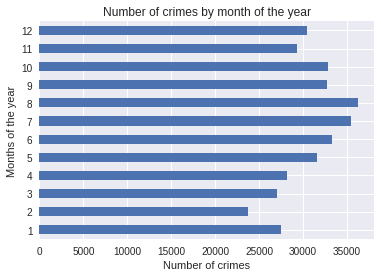

In [24]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


In [25]:
data.Month.value_counts(normalize=True)

8     0.098486
7     0.096195
6     0.090506
10    0.089078
9     0.088964
5     0.085650
12    0.082637
11    0.079567
4     0.076562
1     0.074597
3     0.073245
2     0.064514
Name: Month, dtype: float64

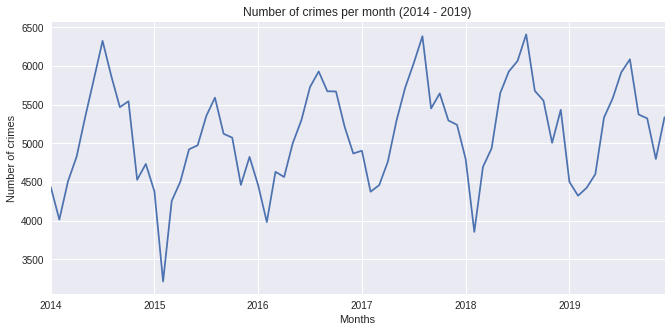

In [26]:
plt.figure(figsize=(11,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2014 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

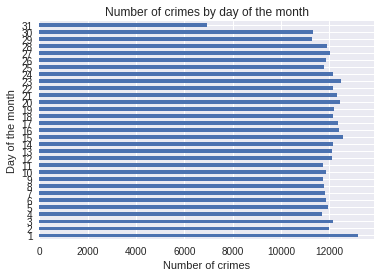

In [27]:
data.groupby([data.dayOfMonth]).size().plot(kind='barh')
plt.ylabel('Day of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the month')
plt.show()


In [28]:
data.dayOfMonth.value_counts(normalize=True)

1     0.035829
15    0.034062
23    0.033836
20    0.033812
16    0.033611
17    0.033513
21    0.033465
19    0.033047
24    0.033017
18    0.032979
3     0.032976
14    0.032962
22    0.032954
12    0.032865
13    0.032848
27    0.032629
2     0.032542
5     0.032368
28    0.032322
6     0.032251
26    0.032216
10    0.032208
7     0.032069
8     0.031999
25    0.031991
9     0.031871
11    0.031809
4     0.031730
30    0.030745
29    0.030644
31    0.018829
Name: dayOfMonth, dtype: float64

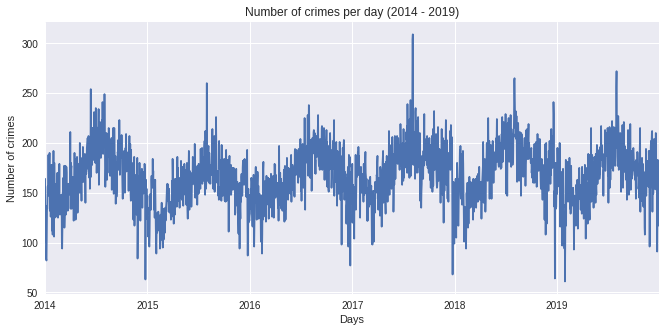

In [29]:
plt.figure(figsize=(11,5))
data.resample('D').size().plot(legend=False)
plt.title('Number of crimes per day (2014 - 2019)')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()


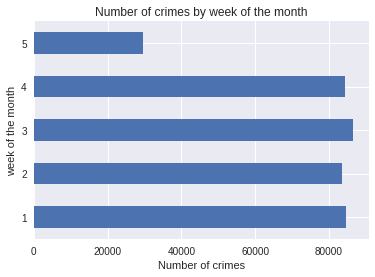

In [30]:
data.groupby([data.weekOfMonth]).size().plot(kind='barh')
plt.ylabel('week of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by week of the month')
plt.show()


In [31]:
data.weekOfMonth.value_counts(normalize=True)

3    0.234488
1    0.229766
4    0.228965
2    0.226563
5    0.080218
Name: weekOfMonth, dtype: float64

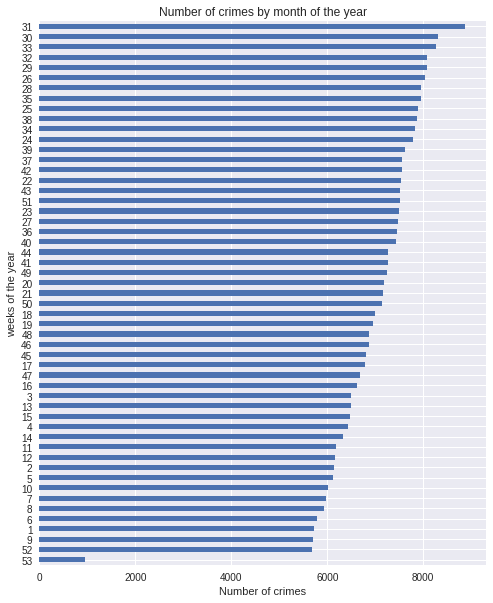

In [32]:
plt.figure(figsize=(8,10))
data.groupby([data.weekOfYear]).size().sort_values().plot(kind='barh')
plt.ylabel('weeks of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


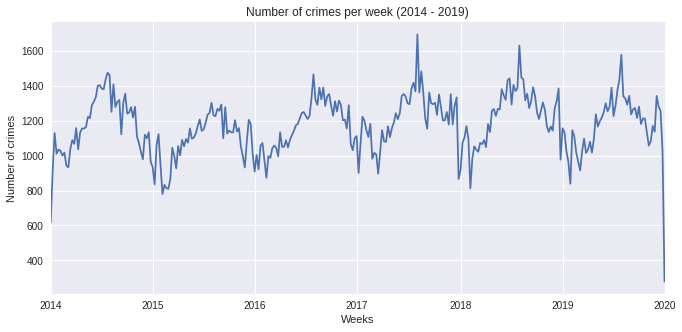

In [33]:
plt.figure(figsize=(11,5))
data.resample('W').size().plot(legend=False)
plt.title('Number of crimes per week (2014 - 2019)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()


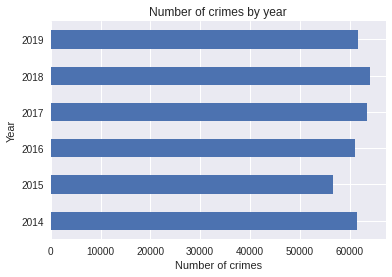

In [34]:
data.groupby([data.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()


In [35]:
data.Year.value_counts(normalize=True)

2018    0.173780
2017    0.172592
2019    0.167244
2014    0.166813
2016    0.165681
2015    0.153890
Name: Year, dtype: float64

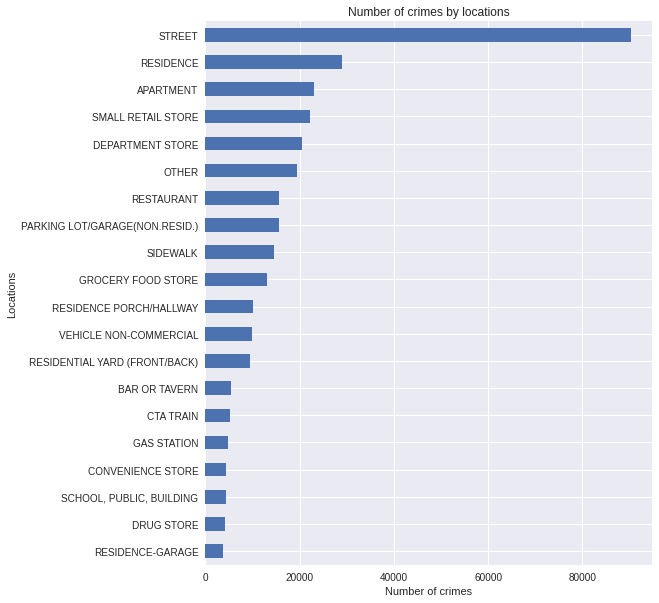

In [37]:
plt.figure(figsize=(8,10))
data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-20:].plot(kind='barh')
plt.title('Number of crimes by locations')
plt.ylabel('Locations')
plt.xlabel('Number of crimes')
plt.show()


In [38]:
data['Location Description'].value_counts()

STREET                              90258
RESIDENCE                           29058
APARTMENT                           22995
SMALL RETAIL STORE                  22266
DEPARTMENT STORE                    20413
                                    ...  
FACTORY / MANUFACTURING BUILDING        1
SCHOOL - PUBLIC BUILDING                1
VEHICLE-COMMERCIAL - TROLLEY BUS        1
VEHICLE - COMMERCIAL                    1
HORSE STABLE                            1
Name: Location Description, Length: 115, dtype: int64

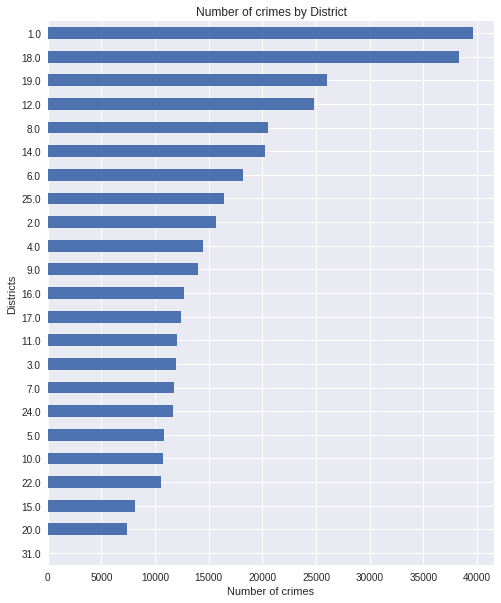

In [39]:
plt.figure(figsize=(8,10))
data.groupby([data['District']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by District')
plt.ylabel('Districts')
plt.xlabel('Number of crimes')
plt.show()


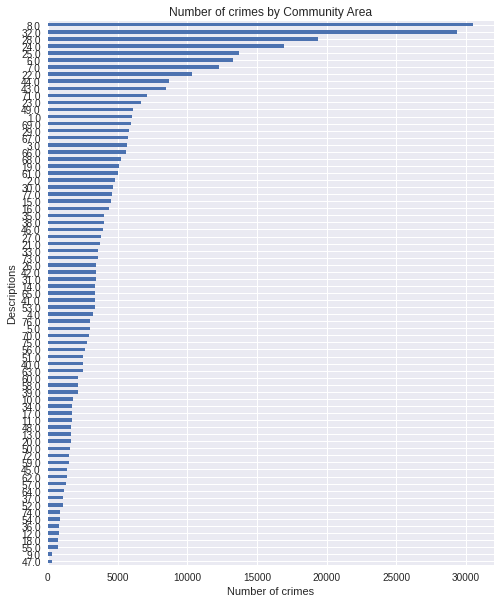

In [40]:
plt.figure(figsize=(8,10))
data.groupby([data['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Community Area')
plt.ylabel('Descriptions')
plt.xlabel('Number of crimes')
plt.show()


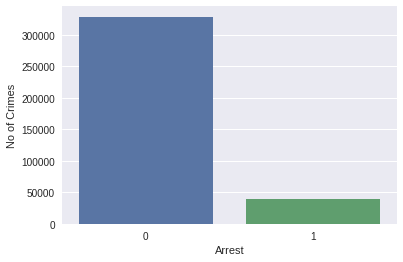

In [41]:
sns.countplot(x='Arrest',data=data)
plt.ylabel('No of Crimes')
plt.show()


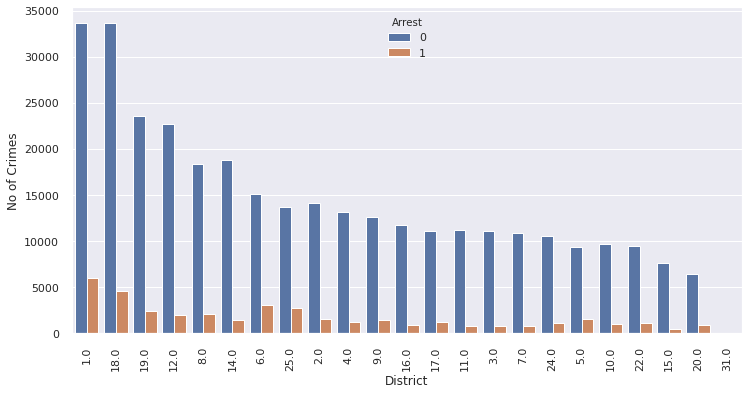

In [42]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='District',hue='Arrest',data=data,order=data['District'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()


In [0]:
data.to_csv('data-clean.csv', index_label=False)